In [2]:
import pandas as pd

url = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(url)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [4]:
a_renomear = {
    "expected_hours" : "horas_esperada",
    "price" : "preco",
    "unfinished" : "nao_finalizado"
}

dados = dados.rename(columns = a_renomear)

In [5]:
trocar = {
    0:1,
    1:0
}
dados["finalizado"] = dados.nao_finalizado.map(trocar)
dados.head()

,nao_finalizado,horas_esperada,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


<AxesSubplot:xlabel='horas_esperada', ylabel='preco'>

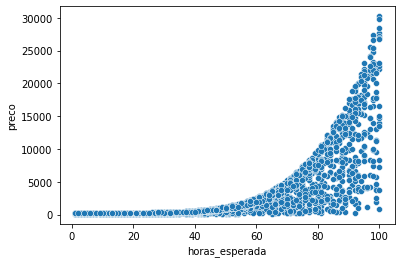

In [6]:
import seaborn as sns

sns.scatterplot(x = "horas_esperada", y = "preco", data = dados)

<AxesSubplot:xlabel='horas_esperada', ylabel='preco'>

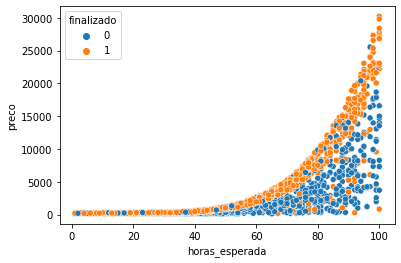

In [7]:
sns.scatterplot(x = "horas_esperada", y = "preco", hue = "finalizado", data = dados)

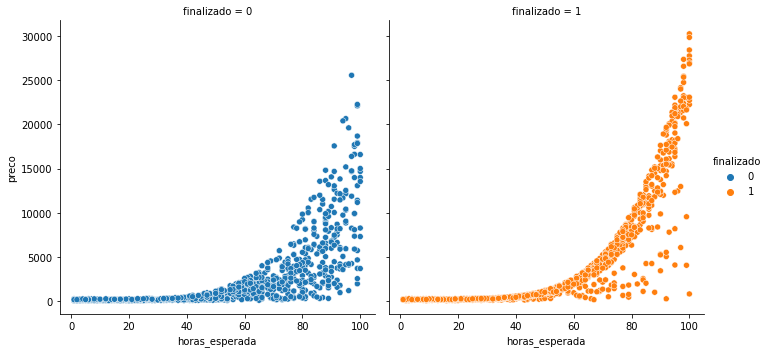

In [9]:
sns.relplot(x = "horas_esperada", y = "preco", hue = "finalizado", col = "finalizado", data = dados)

In [27]:
x = dados[["horas_esperada", "preco"]]
y = dados["finalizado"]

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC(gamma='auto')
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 59.07%


In [28]:
import numpy as np
previsoes_base = np.ones(540)


In [29]:

acuracia_base = accuracy_score(teste_y, previsoes_base)*100
print("A acurácia base é de %.2f%%" % acuracia_base)

A acurácia base é de 52.59%


<AxesSubplot:xlabel='horas_esperada', ylabel='preco'>

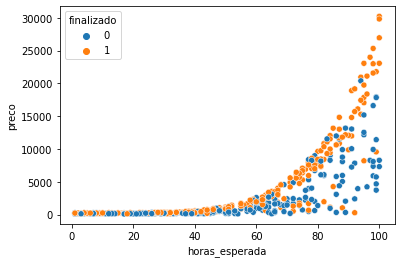

In [30]:

sns.scatterplot(x = "horas_esperada", y = "preco", hue = teste_y, data = teste_x)

In [31]:
x_min = teste_x.horas_esperada.min()
x_max = teste_x.horas_esperada.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max, y_min, y_max)

1 100 100 30223


In [32]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [33]:
xx,yy = np.meshgrid(eixo_x,eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [34]:
z = modelo.predict(pontos)
z.reshape
xx.shape

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1, 1, 0, ..., 1, 1, 1])

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC(gamma='auto')
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)*100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85%
